#  AMAZON PRODUCT REVIEW

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
StopWords = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scipy.stats as stats
import seaborn as sns
from copy import deepcopy


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## LOADING THE DATASET

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\archive\amazon_alexa.tsv",delimiter = '\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


## BASIC INFORMATION

In [3]:
df.shape

(3150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
for i in df.columns:
    print(i)
    print('-------')
    print(df[i].value_counts())
    print('*****')

rating
-------
5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64
*****
date
-------
30-Jul-18    1603
29-Jul-18     482
28-Jul-18     250
26-Jul-18      85
31-Jul-18      81
             ... 
2-Jun-18        2
9-Jun-18        1
29-May-18       1
4-Jun-18        1
13-Jun-18       1
Name: date, Length: 77, dtype: int64
*****
variation
-------
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64
*****
verified_reviews
-

In [6]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

## FEATURE ENGINEERING

In [7]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1


In [8]:
df.dtypes

rating                       int64
date                datetime64[ns]
variation                   object
verified_reviews            object
feedback                     int64
dtype: object

## EDA

### DISTRIBUTION OF RATINGS

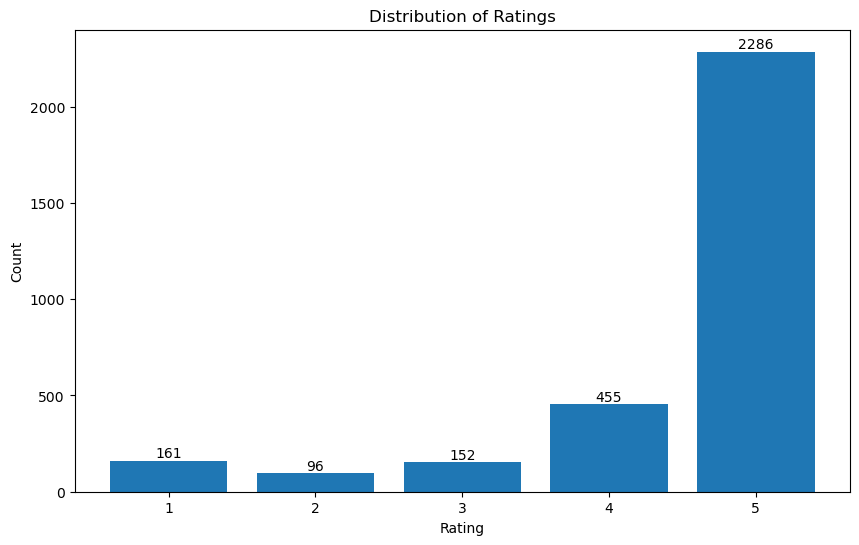

In [9]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts.index, rating_counts)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                            
        f'{int(height)}',                  
        ha='center',                       
        va='bottom'                        
    )

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')

plt.show()


### POSITIVE REVIEWS

In [10]:
#Positive reviews
feedback_one = df[df['feedback']==1]
feedback_one

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,2018-07-30,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,2018-07-30,Black Dot,"Listening to music, searching locations, check...",1
3147,5,2018-07-30,Black Dot,"I do love these things, i have them running my...",1
3148,5,2018-07-30,White Dot,Only complaint I have is that the sound qualit...,1


In [11]:
#Postive feedback ratings
feedback_one_vc = df[df['feedback']==1]['rating'].value_counts()
feedback_one_vc

5    2286
4     455
3     152
Name: rating, dtype: int64

### NEGATIVE REVIEWS

In [12]:
#negative feedback
feedback_zero = df[df['feedback']==0]
feedback_zero

,rating,date,variation,verified_reviews,feedback
46,2,2018-07-30,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,2018-07-30,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,2018-07-30,Charcoal Fabric,Not much features.,0
162,1,2018-07-30,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,2018-07-30,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,2018-07-30,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,2018-07-30,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,2018-07-30,Black Dot,The only negative we have on this product is t...,0
3091,1,2018-07-30,Black Dot,I didn’t order it,0


In [13]:
#Postive feedback ratings
feedback_zero_vc = df[df['feedback']==0]['rating'].value_counts()
feedback_zero_vc

1    161
2     96
Name: rating, dtype: int64

### REVIEW PERCENTAGE

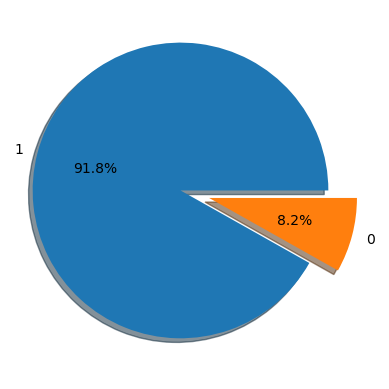

In [14]:
#Positive and negative feedback percentage
feedback_counts = df['feedback'].value_counts()
plt.pie(feedback_counts, labels = feedback_counts.index, explode = [0.1,0.1], shadow = True, autopct = '%1.1f%%')
plt.show()

## PRODUCT VARIATION 

In [15]:
#Variation value count
print('Variation value count')
print('---------------------')
variation_counts=df['variation'].value_counts()
variation_counts

Variation value count
---------------------


Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

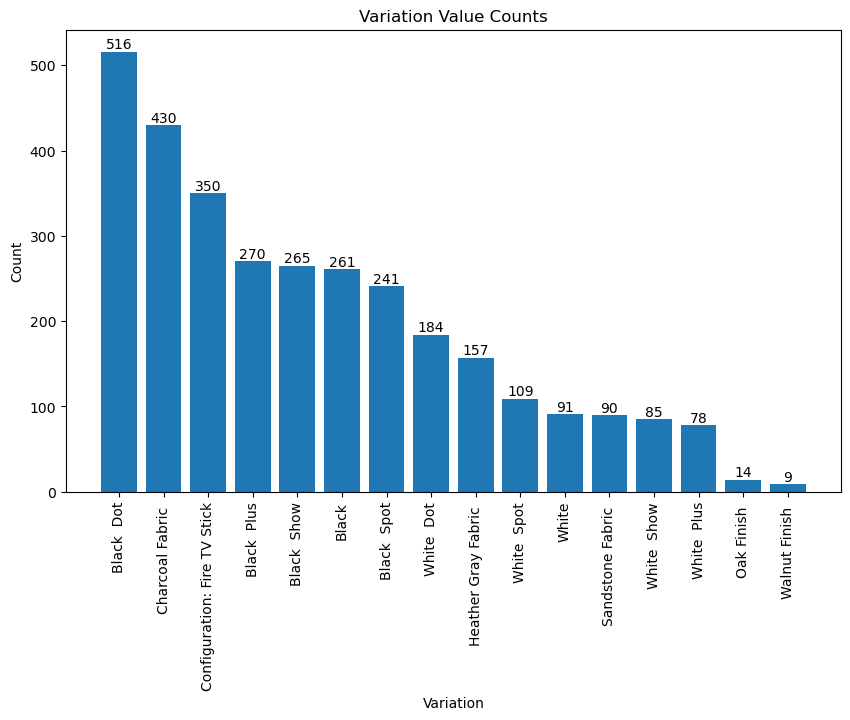

In [16]:
plt.figure(figsize=(10, 6))
bars = plt.bar(variation_counts.index, variation_counts)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                            
        f'{int(height)}',                  
        ha='center',                       
        va='bottom'                        
    )

plt.xlabel('Variation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Variation Value Counts')

plt.show()


In [17]:
# STATISTICAL ANALYSIS

groups = [df[df['variation'] == variation]['rating'] for variation in df['variation'].unique()]
f_statistic, p_value = stats.f_oneway(*groups)
print(f'ANOVA F-statistic: {f_statistic:.2f}')
print(f'ANOVA p-value: {p_value:.4f}')

if p_value < 0.05:
    print('There is a significant difference in ratings across variations.')
else:
    print('No significant difference in ratings across variations.')


ANOVA F-statistic: 5.20
ANOVA p-value: 0.0000
There is a significant difference in ratings across variations.


In [18]:
# comparing if variation has any impact on rating
mean_ratings = df.groupby('variation')['rating'].mean()
# Sort mean ratings in descending order
sorted_mean_ratings = mean_ratings.sort_values(ascending=False)
sorted_mean_ratings

variation
Walnut Finish                   4.888889
Oak Finish                      4.857143
Charcoal Fabric                 4.730233
Heather Gray Fabric             4.694268
Configuration: Fire TV Stick    4.591429
Black  Show                     4.490566
Black  Dot                      4.453488
White  Dot                      4.423913
Black  Plus                     4.370370
White  Plus                     4.358974
Sandstone Fabric                4.355556
White  Spot                     4.311927
Black  Spot                     4.311203
White  Show                     4.282353
Black                           4.233716
White                           4.142857
Name: rating, dtype: float64

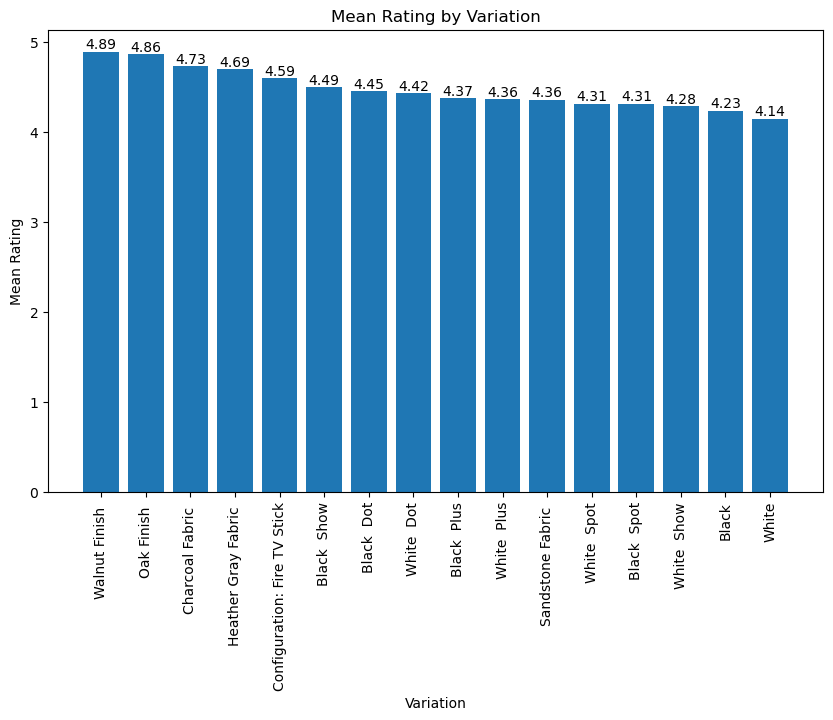

In [19]:
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_mean_ratings.index, sorted_mean_ratings)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                            
        f'{height:.2f}',                   
        ha='center',                       
        va='bottom'                        
    )

plt.xlabel('Variation')
plt.ylabel('Mean Rating')
plt.title('Mean Rating by Variation')
plt.xticks(rotation=90)

plt.show()


# WORD CLOUD

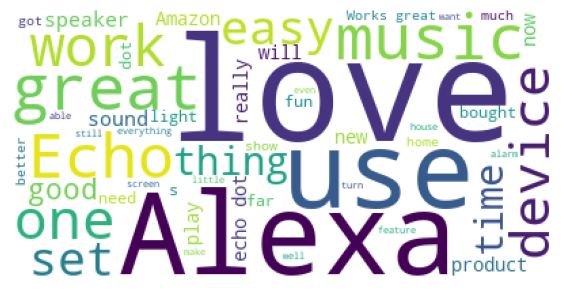

In [20]:
# Visualize word cloud for data with generalized feedback
wc = WordCloud(background_color='white', max_words = 50)
reviews = ' '.join([review for review in df['verified_reviews']])

plt.figure(figsize = (7,7))
plt.imshow(wc.generate(reviews)) #imshow() function in pyplot module of matplotlib library is used to display data as an image; i.e. on a 2D regular raster.
plt.axis('off')
plt.show()

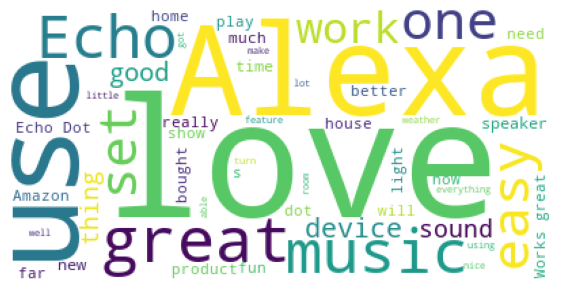

In [21]:
# Visualize word cloud for data with positive feedback
pos_reviews = ' '.join([review for review in df[df['feedback'] == 1]['verified_reviews']])
# Visualize word cloud
plt.figure(figsize = (7,7))
plt.imshow(wc.generate(pos_reviews))
plt.axis('off')
plt.show()

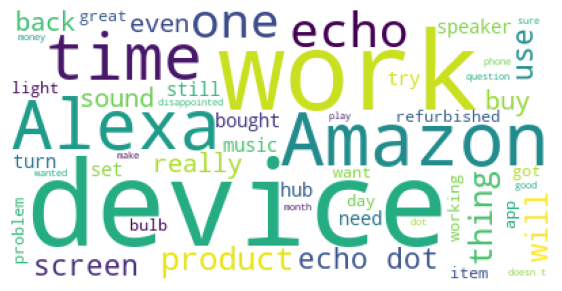

In [22]:
# Visualize word cloud for data with negative feedback
neg_reviews = ' '.join([review for review in df[df['feedback'] == 0]['verified_reviews']])
plt.figure(figsize = (7,7))
plt.imshow(wc.generate(neg_reviews))
plt.axis('off')
plt.show()

In [23]:
reviews

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

# TEXT PRE-PROCESSING

In [24]:
dff=df.copy()

In [25]:
def stemming(content, stemmer):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stop_words = set(stopwords.words('english'))
    stemmed_content = [stemmer.stem(word) for word in stemmed_content if word not in stop_words]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content


In [26]:
dff['verified_reviews'].head()

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

In [27]:
stemmer = PorterStemmer()

In [28]:
dff['verified_reviews'] = dff['verified_reviews'].apply(lambda x: stemming(x, stemmer))
dff['verified_reviews'].head()

0                                            love echo
1                                                 love
2    sometim play game answer question correctli al...
3    lot fun thing yr old learn dinosaur control li...
4                                                music
Name: verified_reviews, dtype: object

# VECTORIZATION 

In [29]:
vectorizer = CountVectorizer(max_features = 2500)

In [30]:
X = vectorizer.fit_transform(dff['verified_reviews']).toarray()

In [31]:
print(X[:3])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# MODEL BUILDING

In [32]:
Y = dff['feedback']
print(f'x shape {X.shape}')
print(f'y shape {Y.shape}')

x shape (3150, 2500)
y shape (3150,)


In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify = Y, train_size = 0.7, random_state = 42)
print(f'x train shape {x_train.shape}, x test shape {x_test.shape}')
print(f'y train shape {y_train.shape}, y test shape {y_test.shape}')

x train shape (2205, 2500), x test shape (945, 2500)
y train shape (2205,), y test shape (945,)


In [34]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [35]:
def fit_predict(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    train_score = classifier.score(x_train, y_train)
    test_score = classifier.score(x_test, y_test)
    print(f'train score is {train_score}, test score is {test_score}')
    
    test_prediction = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, test_prediction) 
    cf_matrix = confusion_matrix(y_test, test_prediction)
    cl_report = classification_report(y_test, test_prediction)
    
    plt.figure(figsize=(7,7))
    sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    print(f'accuracy: {accuracy}\nclassification report:\n{cl_report}', '\n\n')
    
    return classifier


In [36]:
models = {
    'LogisticRegression': LogisticRegression(),
    'XGBClassifier':XGBClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier()
}

LogisticRegression:

train score is 0.963265306122449, test score is 0.9322751322751323


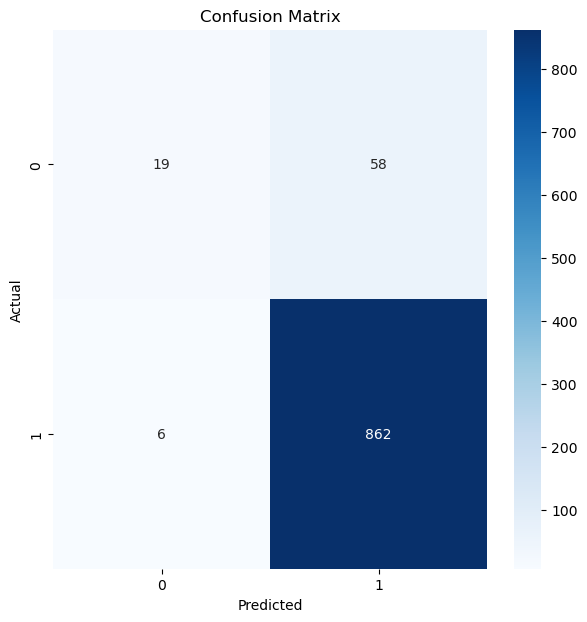

accuracy: 0.9322751322751323
classification report:
              precision    recall  f1-score   support

           0       0.76      0.25      0.37        77
           1       0.94      0.99      0.96       868

    accuracy                           0.93       945
   macro avg       0.85      0.62      0.67       945
weighted avg       0.92      0.93      0.92       945
 


XGBClassifier:

train score is 0.9727891156462585, test score is 0.9343915343915344


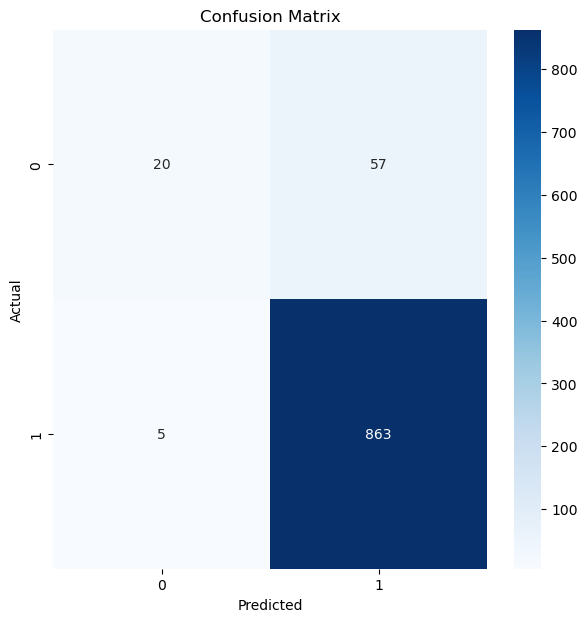

accuracy: 0.9343915343915344
classification report:
              precision    recall  f1-score   support

           0       0.80      0.26      0.39        77
           1       0.94      0.99      0.97       868

    accuracy                           0.93       945
   macro avg       0.87      0.63      0.68       945
weighted avg       0.93      0.93      0.92       945
 


DecisionTreeClassifier:

train score is 0.9936507936507937, test score is 0.9238095238095239


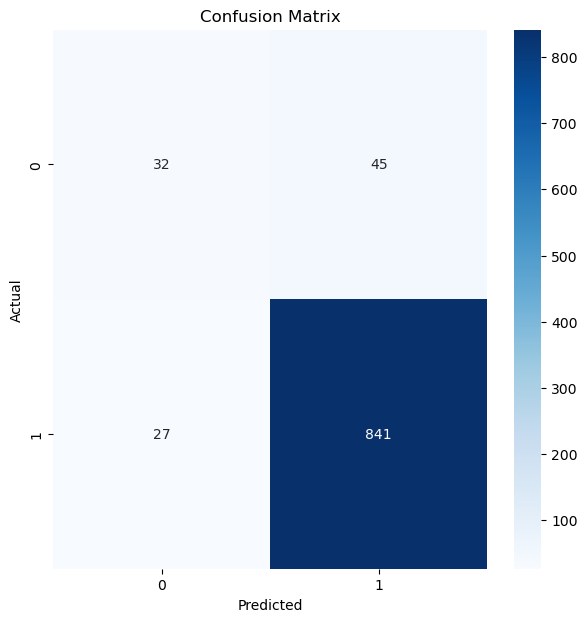

accuracy: 0.9238095238095239
classification report:
              precision    recall  f1-score   support

           0       0.54      0.42      0.47        77
           1       0.95      0.97      0.96       868

    accuracy                           0.92       945
   macro avg       0.75      0.69      0.71       945
weighted avg       0.92      0.92      0.92       945
 


RandomForestClassifier:

train score is 0.9936507936507937, test score is 0.9365079365079365


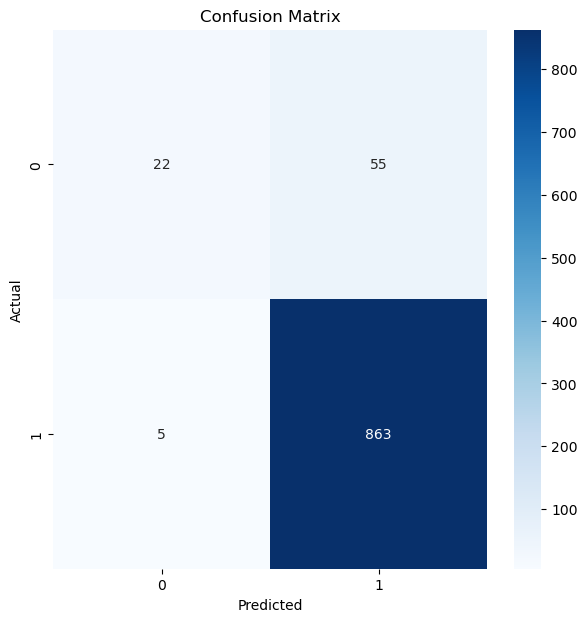

accuracy: 0.9365079365079365
classification report:
              precision    recall  f1-score   support

           0       0.81      0.29      0.42        77
           1       0.94      0.99      0.97       868

    accuracy                           0.94       945
   macro avg       0.88      0.64      0.69       945
weighted avg       0.93      0.94      0.92       945
 


GradientBoostingClassifier:

train score is 0.9537414965986395, test score is 0.928042328042328


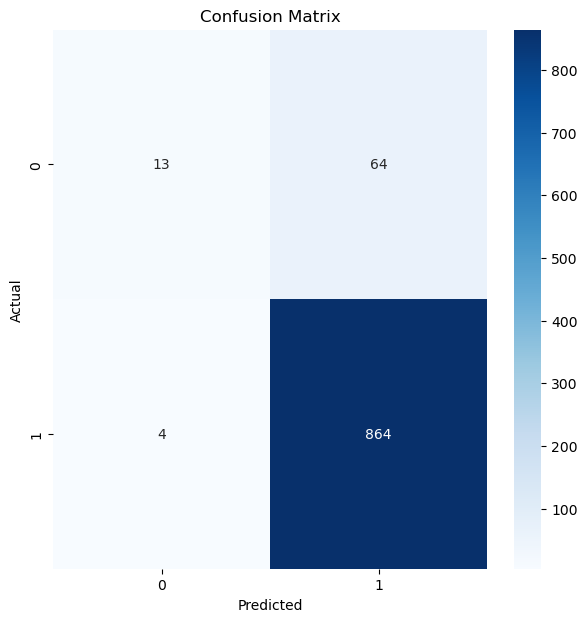

accuracy: 0.928042328042328
classification report:
              precision    recall  f1-score   support

           0       0.76      0.17      0.28        77
           1       0.93      1.00      0.96       868

    accuracy                           0.93       945
   macro avg       0.85      0.58      0.62       945
weighted avg       0.92      0.93      0.91       945
 




In [39]:
trained_models = {}
for name, model in models.items():
    print(f'{name}:\n')
    model = fit_predict(model, x_train_scaled, y_train, x_test_scaled, y_test)
    trained_models[name] = deepcopy(model)

In [42]:
# Decision Tree Classifier model is the best one on the test data with accuracy 93%